In [1]:
from Generation import scenarios_regression
import cvxpy as cp
from utils import solver_cvx, grad_FOM, eval_loss, plot_surface
import matplotlib.pyplot as plt
import numpy as np

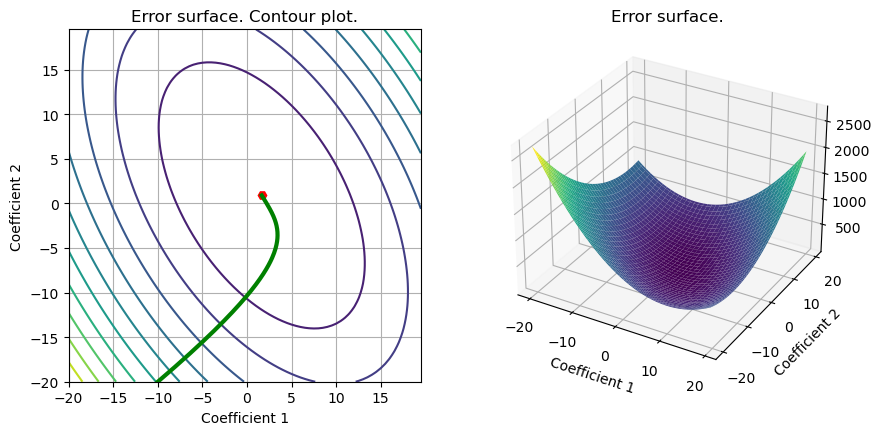

In [2]:
# Loading scenarios
# ===========================
scenario=1;
data_reg, set_up =scenarios_regression(scenario);

# Definition of the problem
#===================================
loss_fn = lambda n, X, Y, w: (1/n)*cp.pnorm(X @ w - Y, p=2)**2
reg_L2 = lambda w: cp.pnorm(w, p=2)**2

loss_LS_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)
grad_LS_L2 = lambda n, X, Y, w, lambd: (2/n)*X.T@(X @ w - Y) + lambd * w

# Different ways to solve theoreticaly the LS
#=========================================
# Solution of the empirical risk using CVX
w_L2_cvx=solver_cvx(set_up,loss_LS_L2);

# Gradient descent
out_gd =grad_FOM(set_up,grad_LS_L2);

# We plot the surface
S = plot_surface(set_up,loss_LS_L2,w_L2_cvx,include_grad=True, grad=out_gd);

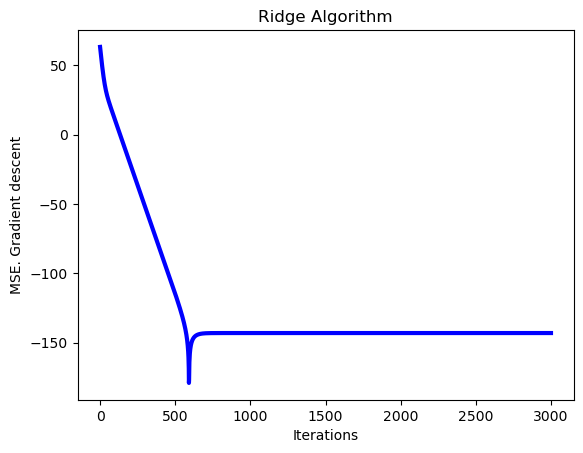

In [3]:
# Plot of learning curves
w = cp.Variable(w_L2_cvx.shape[0])
w.value = w_L2_cvx
loss_opt=loss_LS_L2(set_up['Niter_train'],set_up['Xtrain'][:,0:set_up['d']+1],set_up['ytrain'][:,0],w_L2_cvx,set_up['Lambda']).value
loss_grad=eval_loss(out_gd,set_up,loss_LS_L2);

plt.plot(np.arange(0,set_up['Niter_train']),10*np.log10(np.sum((loss_grad-loss_opt*np.ones((1,set_up['Niter_train'])))**2,axis=0)),color='b', linewidth = 3)
plt.grid
plt.xlabel('Iterations')
plt.ylabel('MSE. Gradient descent')
plt.title('Ridge Algorithm')
plt.show()